# ***Quora Question Pair Simiarity Detection***

# ***1. Impleting with:***
# ***1.1   all basic features***
# ***1.2   nlp features***
# ***1.3   fuzzy features***
# ***1.4   distance vectors like cosine, euclidean, minkowski calculated from q1    and q2 vectors after converting the sentences into vectors***
# ***1.5   tfidf vectorization of q1 and q2 separately***
# ***1.6   Applying Different ML models***






# ***2 Importing Drive and Mounting Drive to Access Data***

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# ***3. Install Required Libraries***

In [0]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install nltk
!pip install tqdm
!pip install keras
!pip install tensorflow
!pip install pyemd
!pip install fuzzywuzzy
!pip install python-levenshtein
!pip install --upgrade gensim
!pip install Distance

     |████████████████████████████████| 51kB 2.0MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144797 sha256=caadce42d618c3dbd5b34d9d77eebebacd780fda5ac5fa7264df94ae7142f034
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-levenshtein
     |████████████████████████████████| 24.2MB 91.2MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 184kB 3.2MB/s 
  Created wheel for Distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=4d4ceb1a9055a5e3fa33637a3d0a37e6ed5f77a6726d92f94ff6ffd2789d4c8c
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built Distance


In [0]:
!python3 -m pip install -UI --user  'pip<19.2'

     |████████████████████████████████| 1.4MB 3.4MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# ***3. Importing Required Libraries***

In [0]:
import pickle as cPickle
import pandas as pd
import numpy as np
import gensim
import distance
import re
import matplotlib.pyplot as plt
import csv
import os
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
import spacy
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from fuzzywuzzy import fuzz
from nltk.corpus import stopwords
from tqdm import tqdm
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
stop_words = stopwords.words('english')

# ***4. Reading the Data from Google Drive***

In [0]:
data = pd.read_csv('/content/drive/My Drive/Project 4th year/QUORA VIDEO/quora_duplicate_questions.tsv', sep='\t')
data.info()
#data = data.drop(['id', 'qid1', 'qid2'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


# ***4.1 Checking for NULL values and fixing if found***

In [0]:
#Checking whether there are any rows with null values
nan_rows = data[data.isnull().any(1)]
print (nan_rows)

            id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]


In [0]:
# Filling the null values with ' '
data = data.fillna('')
nan_rows = data[data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


# ***5 Defining a function for Preprocessing of Text***


- Preprocessing:
    - 5.1 Removing html tags 
    - 5.2 Removing Punctuations
    - 5.3 Performing stemming
    - 5.4 Removing Stopwords
    - 5.5 Expanding contractions etc.

In [0]:
SAFE_DIV = 0.0001 

stop_words = stopwords.words("english")

def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    return x

# ***6. Defining Function for calculating different basic features and fuzzy features***

In [0]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in stop_words])
    q2_words = set([word for word in q2_tokens if word not in stop_words])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in stop_words])
    q2_stops = set([word for word in q2_tokens if word in stop_words])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(x, y):
    strs = list(distance.lcsubstrings(x, y))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(x), len(y)) + 1)

def extract_features(data):
    # preprocessing each question
    data["question1"] = data["question1"].fillna("").apply(preprocess)
    data["question2"] = data["question2"].fillna("").apply(preprocess)

    # Merging Features with dataset
    
    token_features = data.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    data["cwc_min"]       = list(map(lambda x: x[0], token_features))
    data["cwc_max"]       = list(map(lambda x: x[1], token_features))
    data["csc_min"]       = list(map(lambda x: x[2], token_features))
    data["csc_max"]       = list(map(lambda x: x[3], token_features))
    data["ctc_min"]       = list(map(lambda x: x[4], token_features))
    data["ctc_max"]       = list(map(lambda x: x[5], token_features))
    data["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    data["first_word_eq"] = list(map(lambda x: x[7], token_features))
    data["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    data["mean_len"]      = list(map(lambda x: x[9], token_features))


# ***7. Calculating Features***

In [0]:
#14 MINUTES TO EXECUTE
data['freq_qid1'] = data.groupby('qid1')['qid1'].transform('count') 
data['freq_qid2'] = data.groupby('qid2')['qid2'].transform('count') 
data['freq_q1+q2'] = data['freq_qid1']+data['freq_qid2']
data['freq_q1-q2'] = abs(data['freq_qid1']-data['freq_qid2'])
data['len_q1'] = data.question1.apply(lambda x: len(str(x)))
data['len_q2'] = data.question2.apply(lambda x: len(str(x)))
data['diff_len'] = data.len_q1 - data.len_q2
data['len_char_q1'] = data.question1.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
data['len_char_q2'] = data.question2.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
data['len_word_q1'] = data.question1.apply(lambda x: len(str(x).split()))
data['len_word_q2'] = data.question2.apply(lambda x: len(str(x).split()))
data['common_words'] = data.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)
def word_Total(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * (len(w1) + len(w2))
data['total_words'] = data.apply(word_Total, axis=1)
def word_share(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
data['words_share'] = data.apply(word_share, axis=1)
data['fuzz_qratio'] = data.apply(lambda x: fuzz.QRatio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_WRatio'] = data.apply(lambda x: fuzz.WRatio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_partial_ratio'] = data.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_partial_token_set_ratio'] = data.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_partial_token_sort_ratio'] = data.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_token_set_ratio'] = data.apply(lambda x: fuzz.token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_token_sort_ratio'] = data.apply(lambda x: fuzz.token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)
def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)
data["longest_substr_ratio"]  = data.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
#data = 
extract_features(data)


In [0]:
data.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,2,0,66,57,9,20,20,14,12,10,23.0,0.434783,93,95,98,100,89,100,93,0.965517,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,5,3,51,88,-37,21,29,8,13,4,20.0,0.200000,66,86,73,100,75,86,63,0.442308,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,2,0,73,59,14,25,24,14,10,4,24.0,0.166667,54,63,53,100,71,66,66,0.150000,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0


# ***8. Plotting a Pair Plot of diff basic and fuzzy features***

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


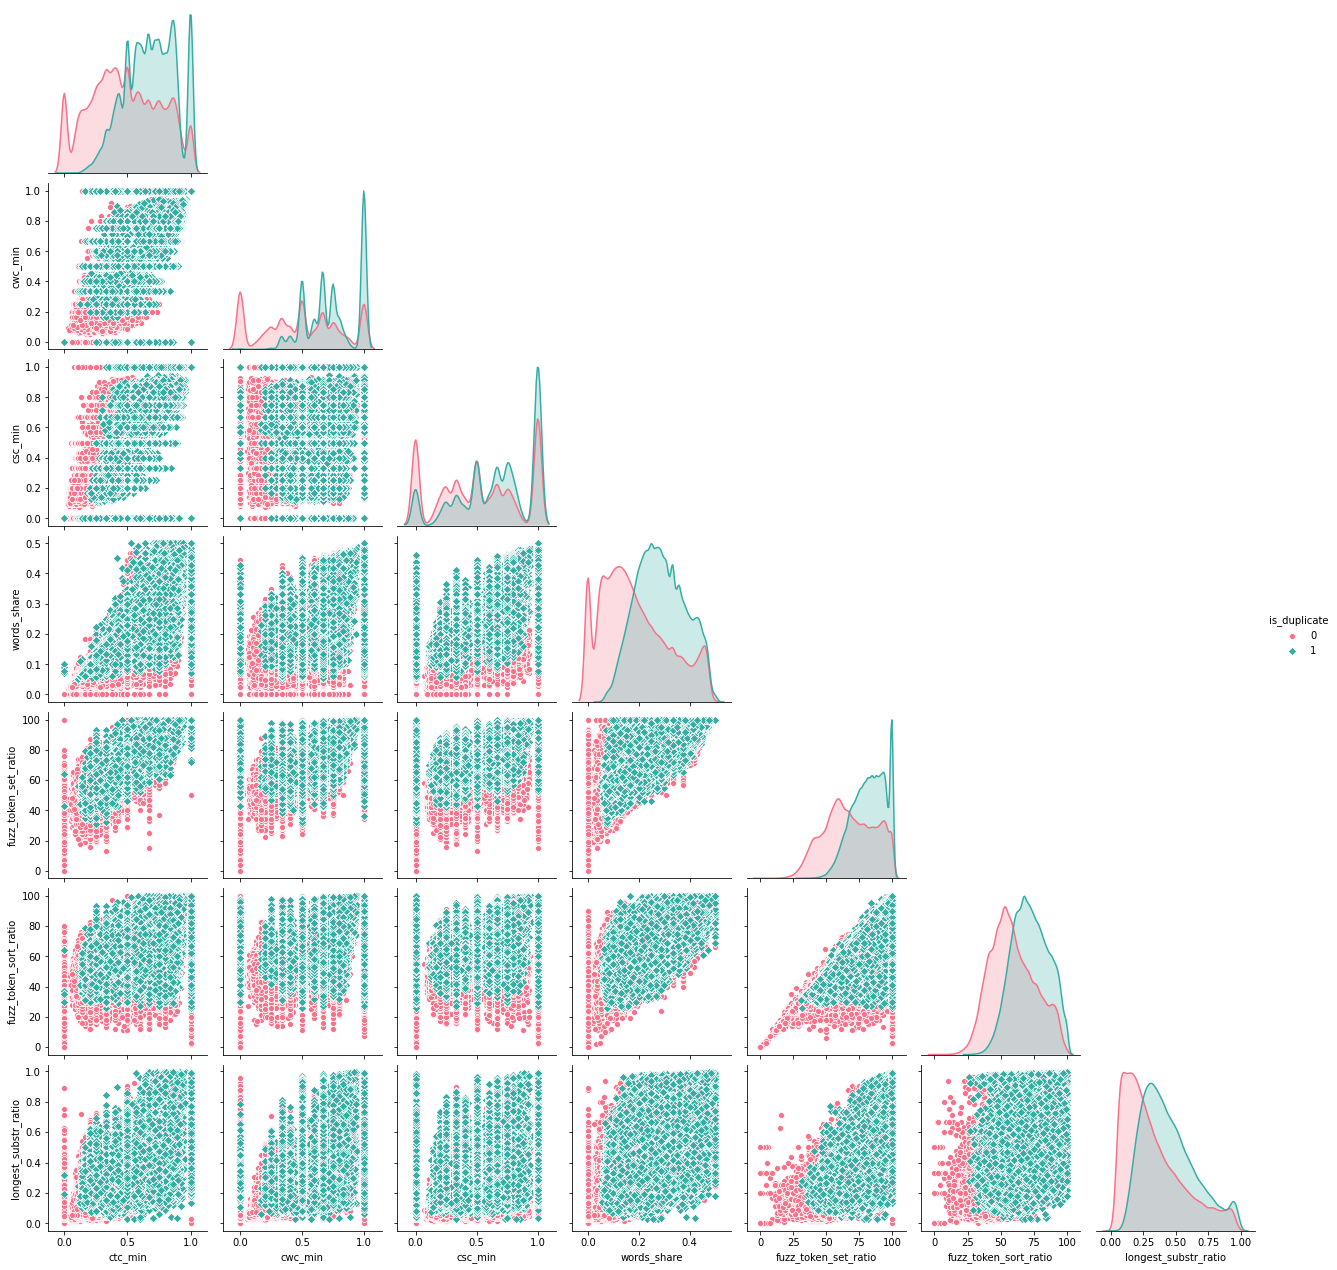

In [0]:
import seaborn as sns
n = data.shape[0] #no of rows
sns.pairplot(data[['ctc_min', 'cwc_min', 'csc_min', 'words_share', 'fuzz_token_set_ratio','fuzz_token_sort_ratio','longest_substr_ratio', 'is_duplicate']][0:n], hue='is_duplicate', corner=True, markers=["o","D"], palette="husl",
vars=['ctc_min', 'cwc_min', 'csc_min', 'words_share', 'fuzz_token_set_ratio','fuzz_token_sort_ratio','longest_substr_ratio'])
plt.show()

In [0]:
data = data.drop(['qid1', 'qid2'], axis=1) #don't drop the 'id' column right now, it will be required while joining q1 and q2 vectors 

In [0]:
data.head(2) #question1 and question2 still kept to calculate question vectors

,id,question1,question2,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,2,0,66,57,9,20,20,14,12,10,23.0,0.434783,93,95,98,100,89,100,93,0.965517,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,5,3,51,88,-37,21,29,8,13,4,20.0,0.200000,66,86,73,100,75,86,63,0.442308,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5


# ***9. Downloading GoogleNews-vectors for converting Q sentence to vectors and then calculating diff distances between them***

In [0]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

--2020-05-03 18:03:06--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.30.54
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.30.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  70.3MB/s    in 25s     

2020-05-03 18:03:30 (63.9 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



# ***10. Defining word_mover, normalized_word_mover and sentence_to_vector function***

In [0]:
def word_mover_distance(s1, s2):
    s1 = str(s1).lower().split()
    s2 = str(s2).lower().split()
    stop_words = stopwords.words('english')
    s1 = [w for w in s1 if w not in stop_words]
    s2 = [w for w in s2 if w not in stop_words]
    return model.wmdistance(s1, s2)


def normalized_word_mover_distance(s1, s2):
    s1 = str(s1).lower().split()
    s2 = str(s2).lower().split()
    stop_words = stopwords.words('english')
    s1 = [w for w in s1 if w not in stop_words]
    s2 = [w for w in s2 if w not in stop_words]
    return norm_model.wmdistance(s1, s2)


def sentence_to_vector(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(model[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    return v / np.sqrt((v ** 2).sum())

# ***11. Calculating Word Mover Distance***

In [0]:
# 8 mins to run
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
data['wmd'] = data.apply(lambda x: word_mover_distance(x['question1'], x['question2']), axis=1) #'word_mover_distance' added to data columns

In [0]:
data_temp = data[['question1','question2','wmd']]
data_temp.head()

,question1,question2,wmd
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0.640008
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,2.472493
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,1.922139
3,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,3.784587
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,2.962591


# ***12. Calculating Normalized Word Mover Distance***

In [0]:
# 8 mins to run
#Normalizing word2vec vectors
#When using the wmdistance method, it is beneficial to normalize the word2vec vectors first, so they all have equal length. To do this, simply call model.init_sims(replace=True) and Gensim will take care of that for you.
norm_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
norm_model.init_sims(replace=True)
data['norm_wmd'] = data.apply(lambda x: normalized_word_mover_distance(x['question1'], x['question2']), axis=1)

In [0]:
data_temp = data[['question1','question2','norm_wmd']]
data_temp.head()

,question1,question2,norm_wmd
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0.198042
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0.877940
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0.694896
3,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,1.261312
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0.972994


# ***13. Converting Q1 and Q2 sentences into tfidf weighted vectors***

In [0]:
'''df = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))'''

In [0]:
'''from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False,)
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))'''

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy".  https://spacy.io/usage/vectors-similarity
- It is trained on Wikipedia and therefore, it is stronger in terms of word semantics. 

In [0]:
'''import en_core_web_sm'''

# ***13.1 Converting Q1 sentences into tfidf weighted vector(Takes 1 hour to train)***

In [0]:
'''# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_vecs'] = list(vecs1)'''

# ***13.2 Converting Q sentences into tfidf weighted vector(takes 1 hour to train)***

In [0]:
'''vecs2 = []
for qu2 in tqdm(list(df['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_vecs'] = list(vecs2)'''

100%|██████████| 404290/404290 [51:38<00:00, 130.49it/s]


# ***14. Converting question1 and question2 to vectors using Google News Vecor(Sentence to Vectors of dimension 300)***

In [0]:
error_count = 0
question1_vectors = np.zeros((data.shape[0], 300))
for i, q in tqdm(enumerate(data.question1.values)):
    question1_vectors[i, :] = sentence_to_vector(q)

question2_vectors  = np.zeros((data.shape[0], 300))
for i, q in tqdm(enumerate(data.question2.values)):
    question2_vectors[i, :] = sentence_to_vector(q)

404290it [01:12, 5577.65it/s]
404290it [01:12, 5553.20it/s]


In [0]:
question1_vectors

array([[-0.08091219,  0.0077042 , -0.01682285, ...,  0.05525358,
         0.0247016 , -0.02719343],
       [-0.07508043,  0.07053458,  0.02010522, ..., -0.06404843,
         0.03878755,  0.05159354],
       [ 0.04230251, -0.00322384,  0.03679858, ..., -0.01808051,
        -0.11013638, -0.05408843],
       ...,
       [-0.00126756,  0.00785884,  0.00709831, ...,  0.00735182,
         0.02557292, -0.00076251],
       [-0.0082281 ,  0.02625634,  0.04778542, ..., -0.01760457,
         0.02830779, -0.00803578],
       [ 0.0253418 ,  0.00810537,  0.02050422, ..., -0.04502985,
        -0.0505335 ,  0.09045997]])

In [0]:
question2_vectors

array([[-0.06372326,  0.01629744, -0.01969495, ...,  0.07126812,
         0.03986768, -0.01777058],
       [-0.07147259,  0.06875872,  0.04711537, ..., -0.05495292,
         0.05454472, -0.00406517],
       [ 0.00078818,  0.00838199, -0.03413426, ..., -0.01732291,
        -0.08087941, -0.02825323],
       ...,
       [-0.01541002,  0.05360006, -0.03930671, ...,  0.01347446,
         0.02799114, -0.00032104],
       [ 0.04522298,  0.082693  ,  0.04575336, ...,  0.04280505,
        -0.0033227 , -0.00439151],
       [ 0.0253418 ,  0.00810537,  0.02050422, ..., -0.04502985,
        -0.0505335 ,  0.09045997]])

# ***15. Calculating different distance between Q1 and Q2 vectors***

In [0]:
# 6 mins to run
#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Special Kudos to Abhisek Thakur for this code snippet
data['cosine_distance'] = [cosine(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]

data['cityblock_distance'] = [cityblock(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]

data['jaccard_distance'] = [jaccard(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]

data['canberra_distance'] = [canberra(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]

data['euclidean_distance'] = [euclidean(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]

data['minkowski_distance'] = [minkowski(x, y, 3) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]

data['braycurtis_distance'] = [braycurtis(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]

data['skew_q1vec'] = [skew(x) for x in np.nan_to_num(question1_vectors)]
data['skew_q2vec'] = [skew(x) for x in np.nan_to_num(question2_vectors)]
data['kur_q1vec'] = [kurtosis(x) for x in np.nan_to_num(question1_vectors)]
data['kur_q2vec'] = [kurtosis(x) for x in np.nan_to_num(question2_vectors)]


In [0]:
data.head(3)

,id,question1,question2,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance,skew_q1vec,skew_q2vec,kur_q1vec,kur_q2vec
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,2,0,66,57,9,20,20,14,12,10,23.0,0.434783,93,95,98,100,89,100,93,0.965517,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,0.640008,0.198042,0.068972,5.081614,1.0,94.023324,0.371408,0.168999,0.186557,0.031817,-0.091902,0.050416,0.337301
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,5,3,51,88,-37,21,29,8,13,4,20.0,0.200000,66,86,73,100,75,86,63,0.442308,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,2.472493,0.877940,0.307825,10.954625,1.0,155.349837,0.784634,0.354073,0.434759,0.004801,0.140036,0.185670,-0.029407
2,2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,2,0,73,59,14,25,24,14,10,4,24.0,0.166667,54,63,53,100,71,66,66,0.150000,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,1.922139,0.694896,0.222009,9.055989,1.0,135.988707,0.666346,0.307828,0.342306,0.239752,0.144554,0.026759,-0.474131


In [0]:
#Converting Q1 vectors into lists to store them in a column. Later drop these columns 'q1_vecs' and 'q2_vecs'
#data['q1_vecs'] = list(question1_vectors) 
#data['q2_vecs'] = list(question2_vectors)

In [0]:
#Creating dataframe for q1_vectors and q2_vectors in order to join with the actual dataset
'''df3_q1 = pd.DataFrame(df.q1_vecs.values.tolist(), index= data.index)
df3_q2 = pd.DataFrame(df.q2_vecs.values.tolist(), index= data.index)'''

# ***16. Reading Q1 and Q2 tdidf vectors from GDrive bcoz it takes almost 1.45 hours to train them***

In [0]:
df3_q1 = pd.read_csv('/content/drive/My Drive/Project 4th year/QUORA VIDEO/q1_tfidf_vec_t.csv')
df3_q2 = pd.read_csv('/content/drive/My Drive/Project 4th year/QUORA VIDEO/q2_tfidf_vec_t.csv')

# ***16.2 Dropping unnecessary columns***

In [0]:
#average word to vector(dim=96) of question1 column 
df3_q1.drop(['Unnamed: 0'], axis=1, inplace=True) 
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,-19.025082,30.407703,-131.289403,-132.103405,52.904241,90.266851,18.937702,-5.182964,-61.376455,-151.893309,55.889683,90.921913,42.547708,87.241869,-42.974541,-96.583975,77.467254,-60.980367,-99.873555,-29.587049,141.788432,21.034183,34.945493,104.268255,51.515985,-18.722168,-197.119967,82.769715,-119.039636,-40.200688,-100.222573,-63.108931,147.857268,-20.944086,60.965034,-14.114837,46.792167,-8.657404,-76.888353,-38.453162,...,-33.115357,191.251386,112.598360,-65.694030,17.868097,128.516417,41.420652,-18.836410,76.444801,-49.723174,49.607123,43.716430,-5.429001,-14.612752,97.440868,-233.268881,-7.190171,27.038406,0.934058,-66.975120,-15.925614,-16.315596,62.968689,-177.386631,112.086032,1.463202,-3.989895,72.717053,-21.084636,-31.095168,-87.327562,102.562203,23.157326,73.647910,-16.079642,-2.087053,142.494740,-140.396991,14.361547,-22.044196
1,-107.513391,76.485826,-138.399411,-128.175290,-29.019105,74.449385,24.753921,16.162435,-4.345508,-35.754816,-12.708938,-11.408058,-54.350553,138.335842,-22.863992,-91.128102,26.158983,-68.026838,-52.376323,72.088147,41.665933,26.307895,3.551057,238.731805,116.459839,-44.638022,14.939973,145.707501,-43.415408,47.646955,-172.738290,118.433745,53.450973,32.049729,77.515471,33.068346,36.182028,147.340121,-86.189398,-42.059093,...,-117.331613,102.498655,182.805305,-80.343331,-45.263448,128.973266,35.915323,-22.061387,269.128632,-42.498125,-115.511214,1.606030,-39.115581,-61.855928,38.634419,-173.443150,-91.159700,100.007220,-20.849318,4.283750,0.931710,47.383805,-17.966281,-110.155277,-83.341730,106.468955,141.539570,150.122577,30.997041,-106.547319,-152.350907,56.232683,112.224383,68.668525,-132.461794,5.614577,63.443425,-125.084109,-74.360633,23.123067
2,-98.370832,-105.838499,-85.035038,-135.944167,63.274705,57.573162,3.784954,40.183860,27.080281,-59.880296,7.933225,180.699717,7.606900,48.903218,49.755031,-58.647255,89.703965,77.907621,-59.109721,-0.776975,48.536964,3.097239,153.806188,114.136914,52.374826,-29.904017,-128.106783,72.969432,-20.826011,69.002697,-69.460216,-53.718808,120.683409,66.315010,27.559638,-32.290597,60.144537,161.533404,-77.624494,-53.737736,...,-24.377449,113.405397,234.570378,-52.990442,-17.707373,58.293526,48.531105,37.151331,-34.588683,-77.258602,-51.150213,-102.597912,-2.873003,-27.902769,10.114027,-75.202074,-106.566394,-37.370588,34.267789,33.127860,-57.073266,-8.801221,42.051497,-141.024090,109.397209,16.086635,-21.356790,25.431668,-29.252676,-89.418602,-111.718714,125.991654,39.411464,91.816007,-55.469447,38.768498,-7.379207,-123.235320,-2.688627,-5.207624
3,11.846884,-69.441897,-104.972933,-33.480250,26.744677,142.427756,8.649164,38.479152,-24.331226,-46.316330,-62.633451,-3.984229,33.226126,-53.607981,-58.759038,9.210047,82.731755,177.385842,-17.924301,29.323703,8.919883,-27.913970,-73.303591,-4.628562,-15.272544,69.005172,-126.750288,136.179657,-8.383487,-17.476641,92.361852,-5.491477,5.468769,15.600224,-27.639386,-26.375968,79.333073,5.238152,-25.009308,135.476231,...,-79.463064,27.322951,26.174051,66.041017,211.376920,-36.370767,66.809068,-77.350091,-44.149292,78.304556,74.616400,-97.997921,23.989384,86.136828,-21.602678,-95.625296,-5.005754,90.889659,34.646596,41.422716,-11.678726,-64.184426,-39.281975,-21.190764,-50.791298,26.137179,-104.193358,38.588609,-84.131186,91.082576,65.919951,24.812937,-71.534837,27.133131,50.103039,-88.737474,31.376285,-66.085595,-84.347586,7.047811
4,-77.952286,2.390032,-191.634536,-225.280350,141.381445,15.397885,-38.772809,102.841476,84.803196,-209.916704,102.061140,112.018897,98.396021,7.745950,27.064271,-63.215137,87.148616,-79.904374,-97.900677,-59.906438,163.644406,81.850488,60.140571,228.079007,141.328610,-75.281238,-157.056207,53.673740,-44.157229,48.695704,-94.308479,-93.094566,96

In [0]:
#average word to vector(dim=96) of question2 column 
df3_q2.drop(['Unnamed: 0'], axis=1, inplace=True)
df3_q2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,-28.113374,14.071277,-110.017215,-121.012773,55.654946,97.055857,36.225506,-8.014744,-46.942517,-135.547529,37.436690,104.246672,54.979989,61.257324,-15.404590,-97.285197,88.801466,-37.853032,-80.806765,-38.172069,102.900042,41.134829,39.149937,101.690933,37.501189,-12.920061,-154.250908,88.314820,-114.291903,-57.753019,-56.434150,-49.452263,123.612574,-12.705277,39.454121,-34.490987,60.699668,-28.291394,-40.220698,-14.005064,...,-51.747504,139.656470,123.083108,-54.678131,35.686501,107.980339,44.814170,-34.867423,50.099808,-56.987461,64.134329,58.286637,-2.082026,5.653899,47.634189,-203.534532,-10.496481,34.020839,19.610732,-51.120419,-1.690206,-47.240427,55.656641,-147.915719,111.577975,-14.552544,-24.371732,33.632220,-34.946124,-17.165686,-63.734833,95.815088,13.500244,89.460432,-3.119276,-28.378399,103.745091,-118.916593,-14.315195,-14.894116
1,-31.698307,80.247898,-171.282321,-224.183348,-51.760656,100.503527,-133.589197,-1.417115,-12.462780,-41.630980,34.003366,-43.792688,-85.258691,138.041903,64.816190,-101.436102,85.187336,21.759240,-99.403510,110.718464,18.665619,89.599723,34.688081,233.658991,136.852047,-13.518850,-91.949699,234.526628,-38.325437,-15.588223,-166.334652,92.310110,69.398134,62.922630,76.139869,50.873269,-6.700677,110.543394,-100.670370,-22.674667,...,-96.414705,143.323504,179.866034,-97.041770,-65.118582,194.132429,116.065501,-11.652900,151.314435,-16.527530,-52.845506,99.199213,-117.928959,43.929530,47.976356,-209.870226,-105.202115,139.767959,-33.524515,30.888495,-21.609441,70.403933,20.959833,-126.601154,7.183832,145.224484,118.326416,89.306322,-2.915070,-39.226306,-148.637855,109.711094,62.538761,72.154373,-137.756543,5.251177,63.611638,-165.109513,-94.521662,25.105437
2,-52.978778,7.761058,-145.027086,-74.633722,5.409296,36.514725,-83.806982,77.081301,27.657251,21.314997,-9.987812,134.063717,-70.975886,3.861793,94.552582,-79.666033,112.450992,83.132840,-4.250624,50.526762,13.335249,-15.355617,91.907193,56.729915,70.138808,109.281858,-141.441063,67.776801,-31.225332,48.051291,-38.114989,-19.329986,32.232071,-38.016924,46.701899,-35.530082,105.493756,94.048393,-16.462779,128.422499,...,-156.792670,156.927170,158.525402,-34.280831,-23.982067,57.600968,49.261007,-43.221784,5.883844,8.659711,-16.573934,-87.459474,-27.978729,46.168408,-14.947797,-109.560979,-76.484418,7.278547,57.218343,38.713664,-132.574819,-6.730614,26.056471,-35.670884,38.674948,46.349380,-1.589361,49.431166,-80.201615,-88.768789,-122.836908,130.318538,44.760427,4.675825,-56.794317,-6.889844,32.630608,-11.958574,-34.432986,28.749957
3,-28.516060,22.681441,-119.779502,-58.153846,10.842537,90.849296,-0.593638,-6.998695,20.539878,-5.490560,34.715617,98.896400,-20.495463,18.428913,13.046875,-32.665056,64.867398,30.238123,-74.709650,55.262615,104.226042,15.668806,-2.719077,36.999636,38.864213,67.057130,-98.703047,46.254840,-48.200955,19.313473,30.640748,-20.755748,80.136817,65.141039,19.344525,-17.029730,29.906158,-61.461534,-32.136746,25.900925,...,-49.753103,113.375155,95.134625,-24.004256,5.344509,-65.060391,93.250547,-60.866538,3.117516,44.181481,21.480907,46.499921,-7.826319,5.512408,-34.703972,-67.123945,-44.818509,14.093371,74.379168,35.275047,-70.185367,-24.186788,71.237293,-46.494897,39.373379,-29.678844,-27.647390,17.838830,-68.712344,-13.117599,-88.775479,82.716187,-63.615549,-4.947012,-58.495738,-14.816066,100.331752,11.372287,-65.016260,-20.112201
4,-28.920562,-47.628021,-90.717239,-73.382467,69.571516,81.649124,-24.962595,47.079588,-1.234543,-100.526939,37.897167,80.943505,35.570766,27.000964,0.106026,-56.172442,69.610260,-27.859136,-9.051113,-11.643530,36.183605,34.178197,25.415460,136.170921,49.085990,-20.856233,-78.129386,44.953330,-64.658369,-51.371675,-92.968043,6.445875,34.863513,-30.86

In [0]:
data.head(2)

,id,question1,question2,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance,skew_q1vec,skew_q2vec,kur_q1vec,kur_q2vec
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,2,0,66,57,9,20,20,14,12,10,23.0,0.434783,93,95,98,100,89,100,93,0.965517,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,0.640008,0.198042,0.068972,5.081614,1.0,94.023324,0.371408,0.168999,0.186557,0.031817,-0.091902,0.050416,0.337301
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,5,3,51,88,-37,21,29,8,13,4,20.0,0.200000,66,86,73,100,75,86,63,0.442308,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,2.472493,0.877940,0.307825,10.954625,1.0,155.349837,0.784634,0.354073,0.434759,0.004801,0.140036,0.185670,-0.029407


# ***16.3 Joining Tables to get the tfidf vectors in our dataframe***

In [0]:
#Now it's time to join data and q1_sen_to_vect and q2_sen_to_vect together and consider it as the final dataset for exposing to different ml and dl models
df1 = data.drop(['question1','question2'],axis=1) #dropping bec we already have sen_to_vec for both q1 and q2
df3_q1['id']=df1['id'] #Incorporatind id column in df3_q1 from df1 for joining purpose. This column will be used to join them
df3_q2['id']=df1['id'] #Incorporatind id column in df3_q2 from df1 for joining purpose. This column will be used to join them
df2  = df3_q1.merge(df3_q2, on='id',how='left') #df3_q1 and df3_q2 joined in a single dataframe df2
final_res  = df1.merge(df2, on='id',how='left') #df2 and df2 joined together

In [0]:
final_res.head()

,id,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,1,1,2,0,66,57,9,20,20,14,12,10,23.0,0.434783,93,95,98,100,89,100,93,0.965517,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,0.640008,0.198042,0.068972,5.081614,1.0,94.023324,...,-51.747504,139.656470,123.083108,-54.678131,35.686501,107.980339,44.814170,-34.867423,50.099808,-56.987461,64.134329,58.286637,-2.082026,5.653899,47.634189,-203.534532,-10.496481,34.020839,19.610732,-51.120419,-1.690206,-47.240427,55.656641,-147.915719,111.577975,-14.552544,-24.371732,33.632220,-34.946124,-17.165686,-63.734833,95.815088,13.500244,89.460432,-3.119276,-28.378399,103.745091,-118.916593,-14.315195,-14.894116
1,1,0,4,1,5,3,51,88,-37,21,29,8,13,4,20.0,0.200000,66,86,73,100,75,86,63,0.442308,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,2.472493,0.877940,0.307825,10.954625,1.0,155.349837,...,-96.414705,143.323504,179.866034,-97.041770,-65.118582,194.132429,116.065501,-11.652900,151.314435,-16.527530,-52.845506,99.199213,-117.928959,43.929530,47.976356,-209.870226,-105.202115,139.767959,-33.524515,30.888495,-21.609441,70.403933,20.959833,-126.601154,7.183832,145.224484,118.326416,89.306322,-2.915070,-39.226306,-148.637855,109.711094,62.538761,72.154373,-137.756543,5.251177,63.611638,-165.109513,-94.521662,25.105437
2,2,0,1,1,2,0,73,59,14,25,24,14,10,4,24.0,0.166667,54,63,53,100,71,66,66,0.150000,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,1.922139,0.694896,0.222009,9.055989,1.0,135.988707,...,-156.792670,156.927170,158.525402,-34.280831,-23.982067,57.600968,49.261007,-43.221784,5.883844,8.659711,-16.573934,-87.459474,-27.978729,46.168408,-14.947797,-109.560979,-76.484418,7.278547,57.218343,38.713664,-132.574819,-6.730614,26.056471,-35.670884,38.674948,46.349380,-1.589361,49.431166,-80.201615,-88.768789,-122.836908,130.318538,44.760427,4.675825,-56.794317,-6.889844,32.630608,-11.958574,-34.432986,28.749957
3,3,0,1,1,2,0,50,65,-15,19,26,11,9,0,19.0,0.000000,35,35,30,37,38,36,36,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,3.784587,1.261312,0.654169,15.913837,1.0,191.543720,...,-49.753103,113.375155,95.134625,-24.004256,5.344509,-65.060391,93.250547,-60.866538,3.117516,44.181481,21.480907,46.499921,-7.826319,5.512408,-34.703972,-67.123945,-44.818509,14.093371,74.379168,35.275047,-70.185367,-24.186788,71.237293,-46.494897,39.373379,-29.678844,-27.647390,17.838830,-68.712344,-13.117599,-88.775479,82.716187,-63.615549,-4.947012,-58.495738,-14.816066,100.331752,11.372287,-65.016260,-20.112201
4,4,0,3,1,4,2,76,39,37,25,18,13,7,2,20.0,0.100000,46,86,54,100,63,67,47,0.150000,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,2.962591,0.972994,0.369993,12.103178,1.0,161.408435,...,-59.080499,57.605044,69.587007,-20.424579,15.047001,117.378057,64.980618,-11.483053,28.822021,-25.483284,59.205792,-21.260412,72.954939,5.833080,34.984780,-88.135085,15.834352,10.370842,24.408399,-26.716716,25.534817,27.765077,35.854763,-151.146289,45.507368,70.565049,-38.632503,23.285528,-32.067179,-10.019553,17.840810,42.080070,-60.014180,19.771544,-13.976706,8.539354,75.278644,-77.371828,24.389920,-26.920906


# ***16.4 Checking whether any nan values and fixing***

In [0]:
#Checking whether there are any rows with null values
nan_rows = final_res[final_res.isnull().any(1)]
print (nan_rows)

            id  is_duplicate  freq_qid1  ...       93_y       94_y       95_y
221        221             1          2  ... -42.906774 -64.049894 -98.264944
493        493             1          8  ... -71.214840 -22.172957 -16.235131
848        848             1          1  ... -57.854810  -1.409707 -15.924579
918        918             1          1  ... -35.906006 -35.537312 -19.163823
1131      1131             0          2  ... -78.287952 -20.988910  51.961991
...        ...           ...        ...  ...        ...        ...        ...
401991  401991             0          1  ... -40.481282  22.981838  -9.110689
402423  402423             0          1  ... -98.691094  -7.278390  27.921502
402984  402984             0          1  ... -58.645593 -54.900362 -71.458008
403697  403697             0          1  ...   8.323204 -56.436547 -13.660344
404176  404176             1          1  ... -49.172970 -59.093370  62.465822

[1172 rows x 239 columns]


In [0]:
nan_values = final_res.isna()
nan_columns = nan_values.any()

columns_with_nan = final_res.columns[nan_columns].tolist()
print(columns_with_nan)

['cosine_distance', 'braycurtis_distance']


In [0]:
final_res_hold = final_res
final_res = final_res.drop(['cosine_distance', 'braycurtis_distance'],axis=1)

In [0]:
# Filling the null values with ' '
final_res = final_res.fillna('')
nan_res = final_res[final_res.isnull().any(1)]
print (nan_rows)

            id  is_duplicate  freq_qid1  ...       93_y       94_y       95_y
221        221             1          2  ... -42.906774 -64.049894 -98.264944
493        493             1          8  ... -71.214840 -22.172957 -16.235131
848        848             1          1  ... -57.854810  -1.409707 -15.924579
918        918             1          1  ... -35.906006 -35.537312 -19.163823
1131      1131             0          2  ... -78.287952 -20.988910  51.961991
...        ...           ...        ...  ...        ...        ...        ...
401991  401991             0          1  ... -40.481282  22.981838  -9.110689
402423  402423             0          1  ... -98.691094  -7.278390  27.921502
402984  402984             0          1  ... -58.645593 -54.900362 -71.458008
403697  403697             0          1  ...   8.323204 -56.436547 -13.660344
404176  404176             1          1  ... -49.172970 -59.093370  62.465822

[1172 rows x 239 columns]


In [0]:
n=final_res.shape[0]
print(n)
final_res.info()

404290
<class 'pandas.core.frame.DataFrame'>
Int64Index: 404290 entries, 0 to 404289
Columns: 237 entries, id to 95_y
dtypes: float64(216), int64(21)
memory usage: 734.1 MB


# ***17 Writing all final features in a csv file for future reference***

In [0]:
final_res.to_csv('quora_all_features_tfidf_tv.csv') # writing all features in a csv file 'quora_all_features.csv', later it will be used for all model running

# ***18. Read the data***

In [0]:
#final_data = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/quora_all_features_tfidf_tv.csv")
final_data = pd.read_csv("quora_all_features_tfidf_tv.csv")

In [0]:
final_data_hold = final_data
final_data_hold.head()

,Unnamed: 0,id,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,cityblock_distance,jaccard_distance,canberra_distance,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0,1,1,2,0,66,57,9,20,20,14,12,10,23.0,0.434783,93,95,98,100,89,100,93,0.965517,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,0.640008,0.198042,5.081614,1.0,94.023324,...,-51.747504,139.656470,123.083108,-54.678131,35.686501,107.980339,44.814170,-34.867423,50.099808,-56.987461,64.134329,58.286637,-2.082026,5.653899,47.634189,-203.534532,-10.496481,34.020839,19.610732,-51.120419,-1.690206,-47.240427,55.656641,-147.915719,111.577975,-14.552544,-24.371732,33.632220,-34.946124,-17.165686,-63.734833,95.815088,13.500244,89.460432,-3.119276,-28.378399,103.745091,-118.916593,-14.315195,-14.894116
1,1,1,0,4,1,5,3,51,88,-37,21,29,8,13,4,20.0,0.200000,66,86,73,100,75,86,63,0.442308,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,2.472493,0.877940,10.954625,1.0,155.349837,...,-96.414705,143.323504,179.866034,-97.041770,-65.118582,194.132429,116.065501,-11.652900,151.314435,-16.527530,-52.845506,99.199213,-117.928959,43.929530,47.976356,-209.870226,-105.202115,139.767959,-33.524515,30.888495,-21.609441,70.403933,20.959833,-126.601154,7.183832,145.224484,118.326416,89.306322,-2.915070,-39.226306,-148.637855,109.711094,62.538761,72.154373,-137.756543,5.251177,63.611638,-165.109513,-94.521662,25.105437
2,2,2,0,1,1,2,0,73,59,14,25,24,14,10,4,24.0,0.166667,54,63,53,100,71,66,66,0.150000,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,1.922139,0.694896,9.055989,1.0,135.988707,...,-156.792670,156.927170,158.525402,-34.280831,-23.982067,57.600968,49.261007,-43.221784,5.883844,8.659711,-16.573934,-87.459474,-27.978729,46.168408,-14.947797,-109.560979,-76.484418,7.278547,57.218343,38.713664,-132.574819,-6.730614,26.056471,-35.670884,38.674948,46.349380,-1.589361,49.431166,-80.201615,-88.768789,-122.836908,130.318538,44.760427,4.675825,-56.794317,-6.889844,32.630608,-11.958574,-34.432986,28.749957
3,3,3,0,1,1,2,0,50,65,-15,19,26,11,9,0,19.0,0.000000,35,35,30,37,38,36,36,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,3.784587,1.261312,15.913837,1.0,191.543720,...,-49.753103,113.375155,95.134625,-24.004256,5.344509,-65.060391,93.250547,-60.866538,3.117516,44.181481,21.480907,46.499921,-7.826319,5.512408,-34.703972,-67.123945,-44.818509,14.093371,74.379168,35.275047,-70.185367,-24.186788,71.237293,-46.494897,39.373379,-29.678844,-27.647390,17.838830,-68.712344,-13.117599,-88.775479,82.716187,-63.615549,-4.947012,-58.495738,-14.816066,100.331752,11.372287,-65.016260,-20.112201
4,4,4,0,3,1,4,2,76,39,37,25,18,13,7,2,20.0,0.100000,46,86,54,100,63,67,47,0.150000,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,2.962591,0.972994,12.103178,1.0,161.408435,...,-59.080499,57.605044,69.587007,-20.424579,15.047001,117.378057,64.980618,-11.483053,28.822021,-25.483284,59.205792,-21.260412,72.954939,5.833080,34.984780,-88.135085,15.834352,10.370842,24.408399,-26.716716,25.534817,27.765077,35.854763,-151.146289,45.507368,70.565049,-38.632503,23.285528,-32.067179,-10.019553,17.840810,42.080070,-60.014180,19.771544,-13.976706,8.539354,75.278644,-77.371828,24.389920,-26.920906


In [0]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Columns: 238 entries, Unnamed: 0 to 95_y
dtypes: float64(216), int64(22)
memory usage: 734.1 MB


In [0]:
final_data.dtypes

Unnamed: 0        int64
id                int64
is_duplicate      int64
freq_qid1         int64
freq_qid2         int64
                 ...   
91_y            float64
92_y            float64
93_y            float64
94_y            float64
95_y            float64
Length: 238, dtype: object

In [0]:
#final_data.drop(data.index[0], inplace=True)
#y_true = final_data['is_duplicate']
#final_data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [0]:
final_data.head()

,Unnamed: 0,id,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,cityblock_distance,jaccard_distance,canberra_distance,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0,1,1,2,0,66,57,9,20,20,14,12,10,23.0,0.434783,93,95,98,100,89,100,93,0.965517,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,0.640008,0.198042,5.081614,1.0,94.023324,...,-51.747504,139.656470,123.083108,-54.678131,35.686501,107.980339,44.814170,-34.867423,50.099808,-56.987461,64.134329,58.286637,-2.082026,5.653899,47.634189,-203.534532,-10.496481,34.020839,19.610732,-51.120419,-1.690206,-47.240427,55.656641,-147.915719,111.577975,-14.552544,-24.371732,33.632220,-34.946124,-17.165686,-63.734833,95.815088,13.500244,89.460432,-3.119276,-28.378399,103.745091,-118.916593,-14.315195,-14.894116
1,1,1,0,4,1,5,3,51,88,-37,21,29,8,13,4,20.0,0.200000,66,86,73,100,75,86,63,0.442308,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,2.472493,0.877940,10.954625,1.0,155.349837,...,-96.414705,143.323504,179.866034,-97.041770,-65.118582,194.132429,116.065501,-11.652900,151.314435,-16.527530,-52.845506,99.199213,-117.928959,43.929530,47.976356,-209.870226,-105.202115,139.767959,-33.524515,30.888495,-21.609441,70.403933,20.959833,-126.601154,7.183832,145.224484,118.326416,89.306322,-2.915070,-39.226306,-148.637855,109.711094,62.538761,72.154373,-137.756543,5.251177,63.611638,-165.109513,-94.521662,25.105437
2,2,2,0,1,1,2,0,73,59,14,25,24,14,10,4,24.0,0.166667,54,63,53,100,71,66,66,0.150000,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,1.922139,0.694896,9.055989,1.0,135.988707,...,-156.792670,156.927170,158.525402,-34.280831,-23.982067,57.600968,49.261007,-43.221784,5.883844,8.659711,-16.573934,-87.459474,-27.978729,46.168408,-14.947797,-109.560979,-76.484418,7.278547,57.218343,38.713664,-132.574819,-6.730614,26.056471,-35.670884,38.674948,46.349380,-1.589361,49.431166,-80.201615,-88.768789,-122.836908,130.318538,44.760427,4.675825,-56.794317,-6.889844,32.630608,-11.958574,-34.432986,28.749957
3,3,3,0,1,1,2,0,50,65,-15,19,26,11,9,0,19.0,0.000000,35,35,30,37,38,36,36,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,3.784587,1.261312,15.913837,1.0,191.543720,...,-49.753103,113.375155,95.134625,-24.004256,5.344509,-65.060391,93.250547,-60.866538,3.117516,44.181481,21.480907,46.499921,-7.826319,5.512408,-34.703972,-67.123945,-44.818509,14.093371,74.379168,35.275047,-70.185367,-24.186788,71.237293,-46.494897,39.373379,-29.678844,-27.647390,17.838830,-68.712344,-13.117599,-88.775479,82.716187,-63.615549,-4.947012,-58.495738,-14.816066,100.331752,11.372287,-65.016260,-20.112201
4,4,4,0,3,1,4,2,76,39,37,25,18,13,7,2,20.0,0.100000,46,86,54,100,63,67,47,0.150000,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,2.962591,0.972994,12.103178,1.0,161.408435,...,-59.080499,57.605044,69.587007,-20.424579,15.047001,117.378057,64.980618,-11.483053,28.822021,-25.483284,59.205792,-21.260412,72.954939,5.833080,34.984780,-88.135085,15.834352,10.370842,24.408399,-26.716716,25.534817,27.765077,35.854763,-151.146289,45.507368,70.565049,-38.632503,23.285528,-32.067179,-10.019553,17.840810,42.080070,-60.014180,19.771544,-13.976706,8.539354,75.278644,-77.371828,24.389920,-26.920906


# ***19. Checking whether there is any nan, infinity or very large values and fixing***

In [0]:
#Checking whether there are any rows with null values
nan_rows = final_data[final_data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [Unnamed: 0, id, is_duplicate, freq_qid1, freq_qid2, freq_q1+q2, freq_q1-q2, len_q1, len_q2, diff_len, len_char_q1, len_char_q2, len_word_q1, len_word_q2, common_words, total_words, words_share, fuzz_qratio, fuzz_WRatio, fuzz_partial_ratio, fuzz_partial_token_set_ratio, fuzz_partial_token_sort_ratio, fuzz_token_set_ratio, fuzz_token_sort_ratio, longest_substr_ratio, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, wmd, norm_wmd, cityblock_distance, jaccard_distance, canberra_distance, euclidean_distance, minkowski_distance, skew_q1vec, skew_q2vec, kur_q1vec, kur_q2vec, 0_x, 1_x, 2_x, 3_x, 4_x, 5_x, 6_x, 7_x, 8_x, 9_x, 10_x, 11_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 18_x, 19_x, 20_x, 21_x, 22_x, 23_x, 24_x, 25_x, 26_x, 27_x, 28_x, 29_x, 30_x, 31_x, 32_x, 33_x, 34_x, 35_x, 36_x, 37_x, 38_x, 39_x, 40_x, 41_x, 42_x, 43_x, 44_x, 45_x, 46_x, 47_x, 48_x, 49_x, 50_x, 51_x, 52_x, 53_x, ...]
Index: []

[0 rows x 2

In [0]:
nan_values = final_data.isna()
nan_columns = nan_values.any()

columns_with_nan = final_data.columns[nan_columns].tolist()
print(columns_with_nan)

[]


In [0]:
'''# Filling the null values with ' '
final_data = final_data.fillna('')
nan_rows = final_data[final_data.isnull().any(1)]
print (nan_rows)'''

"# Filling the null values with ' '\nfinal_data = final_data.fillna('')\nnan_rows = final_data[final_data.isnull().any(1)]\nprint (nan_rows)"

In [0]:
np.where(final_data.values >= np.finfo(np.float64).max)

(array([   221,    221,    493, ..., 403697, 404176, 404176]),
 array([35, 36, 35, ..., 36, 35, 36]))

In [0]:
np.isnan(final_data) #you get a boolean mask back with True for positions containing NaNs.
np.where(np.isnan(final_data)) #you get back a tuple with i, j coordinates of NaNs.
np.nan_to_num(final_data) #you "replace nan with zero and inf with finite numbers".

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.18916593e+02, -1.43151946e+01, -1.48941164e+01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.65109513e+02, -9.45216620e+01,  2.51054371e+01],
       [ 2.00000000e+00,  2.00000000e+00,  0.00000000e+00, ...,
        -1.19585742e+01, -3.44329860e+01,  2.87499567e+01],
       ...,
       [ 4.04287000e+05,  4.04287000e+05,  0.00000000e+00, ...,
        -2.34912205e+01, -1.96649431e+01, -1.14961593e+01],
       [ 4.04288000e+05,  4.04288000e+05,  0.00000000e+00, ...,
        -2.30732569e+02, -3.62532760e+01,  2.42690896e+01],
       [ 4.04289000e+05,  4.04289000e+05,  0.00000000e+00, ...,
        -9.57348281e+01,  2.42871926e+01,  1.92137394e+01]])

In [0]:
#final_data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [0]:
np.where(final_data.values >= np.finfo(np.float64).max)

(array([   221,    221,    493, ..., 403697, 404176, 404176]),
 array([35, 36, 35, ..., 36, 35, 36]))

In [0]:
np.any(np.isnan(final_data))

False

In [0]:
np.all(np.isfinite(final_data))

False

# ***19.1 The part where the nan, infinity values got fixed***

In [0]:
final_data = final_data[~final_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [0]:
y_true = final_data['is_duplicate']
y_true = list(map(int, y_true.values))
final_data.drop(['Unnamed: 0', 'id', 'is_duplicate'], axis=1, inplace=True)

# ***20. Spliting into train and test dataset 70:30***

In [0]:
X_train_final,X_test_final, y_train_final, y_test_final = train_test_split(final_data, y_true, stratify=y_true, test_size=0.3,random_state=13)

# ***21. Saling the dataset***

In [0]:
from sklearn.preprocessing import StandardScaler
#X_train_final = X_train_final[~X_train_final.isin([np.nan, np.inf, -np.inf]).any(1)]
#X_test_final = X_test_final[~X_test_final.isin([np.nan, np.inf, -np.inf]).any(1)]

scale = StandardScaler(with_mean=False)
X_train_final = scale.fit_transform(X_train_final)
X_test_final = scale.transform(X_test_final)

In [0]:
print("Number of data points in train data :",X_train_final.shape)
print("Number of data points in test data :",X_test_final.shape)

Number of data points in train data : (282286, 235)
Number of data points in test data : (120980, 235)


In [0]:
print("<"*15, "Distribution of output variable in train data", ">"*15)
train_distribution = Counter(y_train_final)
train_length = len(y_train_final)
print("Class 0: ",int(train_distribution[0])/train_length,"Class 1: ", int(train_distribution[1])/train_length)
print("<"*15, "Distribution of output variable in train data", ">"*15)
test_distribution = Counter(y_test_final)
test_length = len(y_test_final)
print("Class 0: ",int(test_distribution[1])/test_length, "Class 1: ",int(test_distribution[1])/test_length)

<<<<<<<<<<<<<<< Distribution of output variable in train data >>>>>>>>>>>>>>>
Class 0:  0.6303500704958801 Class 1:  0.36964992950411996
<<<<<<<<<<<<<<< Distribution of output variable in train data >>>>>>>>>>>>>>>
Class 0:  0.3696478756819309 Class 1:  0.3696478756819309


# ***22. Defining a Confusion Matrix***

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# ***23. Applying Logistic Regression with Stochastic Gradient Descent(SGD)classifier and Log Loss, Confusion Matrix***

For values of best alpha =  0.0002032 The train log loss is: 0.3975058281421835
For values of best alpha =  0.0002032 The test log loss is: 0.400262401191614
Total number of data points : 120980


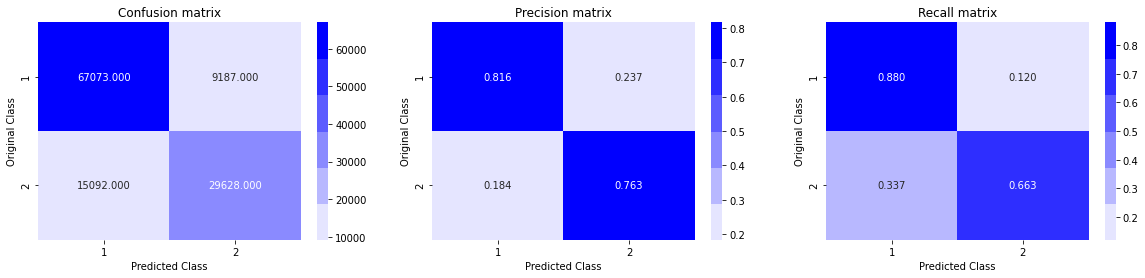

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

alpha = np.random.uniform(0.000025,0.00035,14)
alpha = np.round(alpha,7)
alpha.sort()

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_final, y_train_final)
    predict_y = sig_clf.predict_proba(X_test_final)
    log_error_array.append(log_loss(y_test_final, predict_y, eps=1e-15))
    #print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_final, y_train_final)

predict_y_train = sig_clf.predict_proba(X_train_final)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_final, predict_y_train,eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_final, predict_y_test,eps=1e-15))
predicted_y =np.argmax(predict_y_test,axis=1) # from the whole column of predicted_y picking the highest value
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_final, predicted_y)
#print("The train accuracy is: ", accuracy_score(y_train_final, predict_y_train.round(), normalize=False, sample_weight=None))
#print("The test accuracy is: ", accuracy_score(y_test_final, predict_y_test.round(), normalize=False, sample_weight=None))

# ***24. Applying Linear SVM with Stochastic Gradient Descent(SGD)classifier and Log Loss, Confusion Matrix***

For values of best alpha =  0.0001291 The train log loss is: 0.4006189885796839
For values of best alpha =  0.0001291 The test log loss is: 0.40329099571822147
Total number of data points : 120980


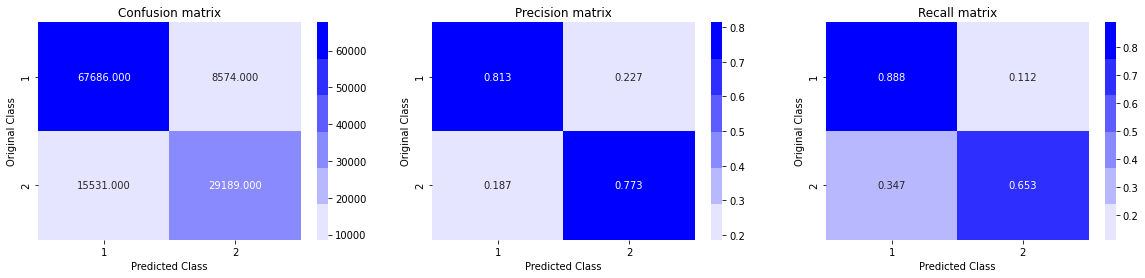

In [0]:
alpha = np.random.uniform(0.000025,0.00035,14)
alpha = np.round(alpha,7)
alpha.sort()

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)#applying hinge loss to apply svm
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_final, y_train_final)
    predict_y = sig_clf.predict_proba(X_test_final)
    log_error_array.append(log_loss(y_test_final, predict_y, eps=1e-15))
    #print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))



best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_final, y_train_final)

predict_y = sig_clf.predict_proba(X_train_final)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_final, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_final, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_final, predicted_y)
#print("The train accuracy is: ", accuracy_score(y_train_final, predict_y_train.round(), normalize=False, sample_weight=None))
#print("The test accuracy is: ", accuracy_score(y_test_final, predict_y_test.round(), normalize=False, sample_weight=None))

# ***25. Random Forest Classifier Bagging(Row Sampling + Column Sampling) and Log Loss, Confusion Matrix*** #

estimators =  75 Train Log Loss  0.34381762823424866 Test Log Loss  0.37594589804755857
estimators =  100 Train Log Loss  0.34321467175912385 Test Log Loss  0.3760628832327492
estimators =  150 Train Log Loss  0.3426310615865547 Test Log Loss  0.3754429488109406
estimators =  200 Train Log Loss  0.3415642687851075 Test Log Loss  0.37400762711869606
estimators =  300 Train Log Loss  0.342455260049411 Test Log Loss  0.3753194256730679
estimators =  400 Train Log Loss  0.342692041877361 Test Log Loss  0.3751382081822963
estimators =  600 Train Log Loss  0.3425744387941161 Test Log Loss  0.37472982375945785


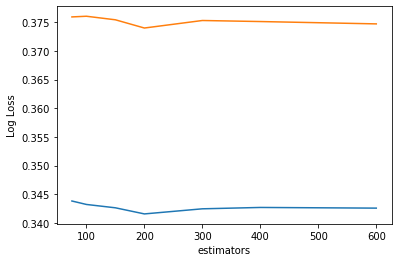

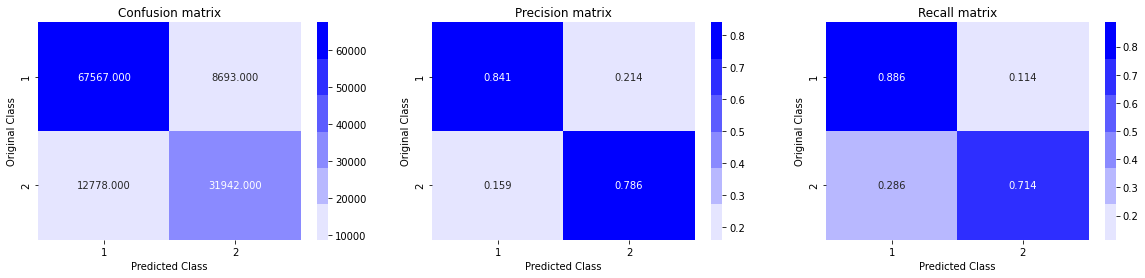

In [0]:
from sklearn.ensemble import RandomForestClassifier as RFC

estimators = [75,100,150,200,300,400,600]
test_scores = []
train_scores = []
for i in estimators:
    clf = RFC(n_estimators=i,max_depth=12,n_jobs=-1)#low bias high variance model, as depth increases variance increases. while bagging the variance will come down automatically in fact very low. n_jobs=-1 to parallalize the task into cpu cores
    #class_weight={0: 1, 1: 1.75}
    clf.fit(X_train_final,y_train_final)
    predict_y = clf.predict_proba(X_train_final)
    log_loss_train = log_loss(y_train_final, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test_final)
    log_loss_test = log_loss(y_test_final, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators') 
plt.ylabel('Log Loss')
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test_final, predicted_y)

# ***26. Extra Tree Classifier Bagging(Row Sampling+Column Sampling+ Randomization on a thresold value) and Log Loss, Confusion Matrix***

estimators =  75 Train Log Loss  0.450102611906145 Test Log Loss  0.4574824435144607
estimators =  100 Train Log Loss  0.45098598666278017 Test Log Loss  0.4579522099853415
estimators =  150 Train Log Loss  0.4525042349159359 Test Log Loss  0.4595575202374123
estimators =  200 Train Log Loss  0.45120648194586865 Test Log Loss  0.45838589870297236
estimators =  300 Train Log Loss  0.450591165516195 Test Log Loss  0.457877510118349
estimators =  400 Train Log Loss  0.45174390149749843 Test Log Loss  0.45881073819637014
estimators =  600 Train Log Loss  0.4521951937339841 Test Log Loss  0.45921927085099207


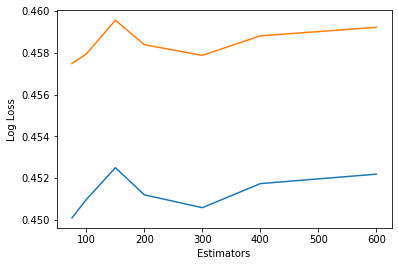

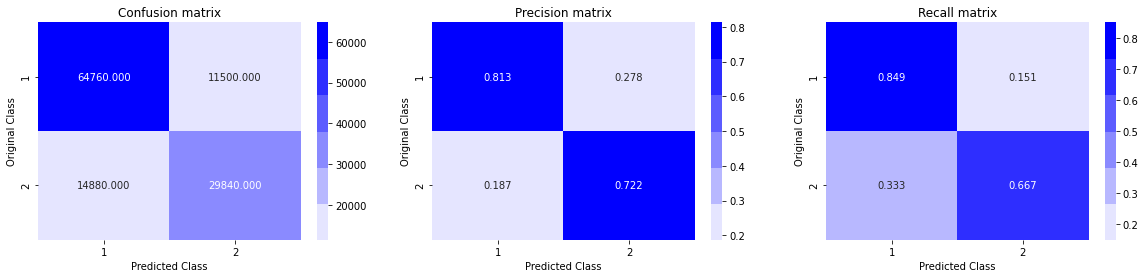

In [0]:
from sklearn.ensemble import ExtraTreesClassifier as EXC

estimators = [75,100,150,200,300,400,600]
test_scores = []
train_scores = []
for i in estimators:
    exc_clf = EXC(n_estimators=i,max_depth=11,n_jobs=-1)#low bias high variance model, as depth increases variance increases. while bagging the variance will come down automatically. n_jobs=-1 to parallalize the task into cpu cores
    exc_clf.fit(X_train_final,y_train_final)
    predict_y = exc_clf.predict_proba(X_train_final)
    log_loss_train = log_loss(y_train_final, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = exc_clf.predict_proba(X_test_final)
    log_loss_test = log_loss(y_test_final, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('Estimators') 
plt.ylabel('Log Loss')
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test_final, predicted_y)

# ***27. XgBoost(Gradient Boost Decision Tree) and Log Loss, Confusion Matrix***

The train log loss is: 0.23062255281875668
The test log loss is: 0.31667970755105135


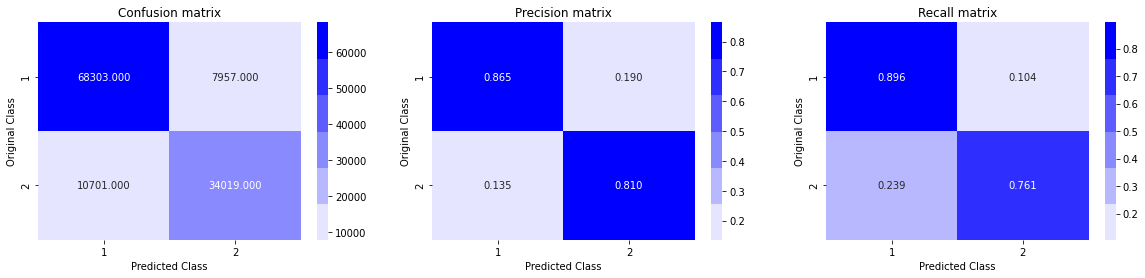

In [0]:
#23 mins to execute
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=12, n_estimators=80, learning_rate=0.08, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
clf.fit(X_train_final,y_train_final)
predict_y = clf.predict_proba(X_train_final)
print("The train log loss is:",log_loss(y_train_final, predict_y, eps=1e-15))
predict_y = clf.predict_proba(X_test_final)
print("The test log loss is:",log_loss(y_test_final, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test_final, predicted_y)

# **28. Stacking Classifier mlextend and Log Loss, Confusion Matrix**

The train log loss is: 0.30921514588491233
The test log loss is: 0.34918981438080887


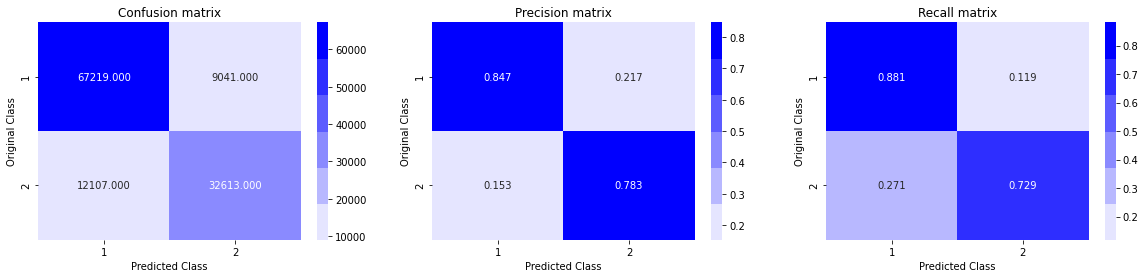

In [0]:
#43 mins to execute
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

estimators = [('rf', RandomForestClassifier(n_estimators=70, max_depth=12, random_state=42)), ('sgc', SGDClassifier(alpha=10**(-5), penalty='l2', loss='hinge', random_state=42)), ('sgdc', (SGDClassifier(alpha=10**(-5), penalty='l2', loss='log', random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=xgb.XGBClassifier(max_depth=10,learning_rate=0.02,n_estimators=400,n_jobs=-1, subsample=0.85, colsample_bytree=0.85))

clf.fit(X_train_final, y_train_final)
predict_y = clf.predict_proba(X_train_final)
print("The train log loss is:",log_loss(y_train_final, predict_y, eps=1e-15))
predict_y = clf.predict_proba(X_test_final)
print("The test log loss is:",log_loss(y_test_final, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test_final, predicted_y)

# ***29. Adaptive Boosting and Log Loss, Confusion Matrix***

The train log loss is: 0.30921514588491233
The test log loss is: 0.5325878474916613


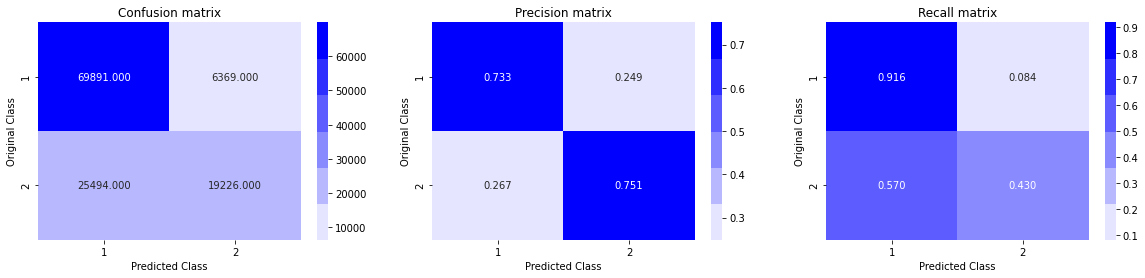

In [0]:
from sklearn.ensemble import AdaBoostClassifier as abc
abc_clf = abc(n_estimators=75, learning_rate=0.02, algorithm='SAMME.R', random_state=42)
abc_clf.fit(X_train_final,y_train_final)
predict_y = clf.predict_proba(X_train_final)
print("The train log loss is:",log_loss(y_train_final, predict_y, eps=1e-15))
predict_y = abc_clf.predict_proba(X_test_final)
print("The test log loss is:",log_loss(y_test_final, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test_final, predicted_y)